In [1]:
import os
os.getcwd()

'/home/jovyan/work/SANER2021/5-PlottingGraphics/1-CodeSamples'

In [2]:
os.chdir("/home/jovyan/work/SANER2021")

In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [4]:
androidListSamples = pd.read_csv("1-GettingQuestions/samplesWithQuestions/androidSamples.csv", index_col=0, skiprows=0)
awsListSamples = pd.read_csv("1-GettingQuestions/samplesWithQuestions/awsSamples.csv", index_col=0, skiprows=0)
azureListSamples = pd.read_csv("1-GettingQuestions/samplesWithQuestions/azureSamples.csv", index_col=0, skiprows=0)
springListSamples = pd.read_csv("1-GettingQuestions/samplesWithQuestions/springSamples.csv", index_col=0, skiprows=0)

In [45]:
def loadMetrics(listSamples):
    metrics = dict()
    for sample in listSamples.index.values:
        metrics[sample] = pd.read_csv(f"3-DataMerge/1-CodeSampleAgregation/{sample}.csv", index_col=[0,1], na_filter=False, infer_datetime_format=False)
        dateframe = pd.DataFrame(metrics[sample].index.values.tolist(), columns=['year','month'])
        dateframe["day"] = 1
        dataframe = pd.to_datetime(dateframe).map(lambda t: t.strftime('%Y'))
        metrics[sample].set_index(dataframe, inplace=True)
    return metrics

In [46]:
androidMetrics = loadMetrics(androidListSamples)
awsMetrics = loadMetrics(awsListSamples)
azureMetrics = loadMetrics(azureListSamples)
springMetrics = loadMetrics(springListSamples)

In [47]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':25,
         'xtick.labelsize': 25,
         'axes.labelsize': 25,
         'ytick.labelsize':25,
          'lines.linewidth': 5
         }
plt.rcParams.update(params)

In [69]:
def plotSourceCodeMetrics(codesample, dataset):
    subplot = dataset["CountLine"].plot(legend=True)
    subplot = dataset["CountLineCode"].plot(legend=True)
    subplot = dataset["CountLineComment"].plot(legend=True)
    #subplot = dataset["questions"].plot(legend=True)
    subplot.set_ylabel("Source code")
    subplot.set_title("Code size")
    subplot.figure.savefig(f"5-PlottingGraphics/1-CodeSamples/sourceCodeSizeExample.pdf",bbox_inches = 'tight')    

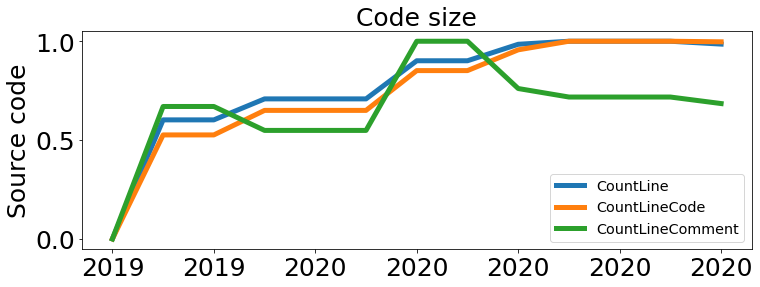

In [70]:
plotSourceCodeMetrics(frameworkName, frameworkMetrics[codesample])

2 - Source code readability

In [71]:
def plotReadability(codesample, dataset):
    subplot = dataset["readability"].plot(legend=True)
#     subplot = dataset["questions"].plot(legend=True)
    subplot.set_title("Source code readability")
    subplot.set_ylabel("Readability")
    subplot.figure.savefig(f"5-PlottingGraphics/1-CodeSamples/sourceCodeReadabilityExample.pdf",bbox_inches = 'tight')

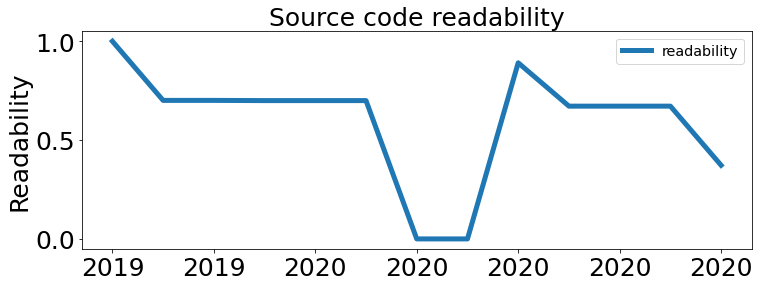

In [72]:
plotReadability(frameworkName, frameworkMetrics[codesample])

3 - Project size

In [73]:
def plotProjectSizeMetrics(codesample, dataset):
    subplot = dataset["numberJavaFiles"].plot(legend=True)
    dataset["CountDeclClass"] = dataset["CountDeclClass"]
    subplot = dataset["CountDeclClass"].plot(legend=True)
    #subplot = dataset["questions"].plot(legend=True)
    subplot.set_title("Project size")
    subplot.set_ylabel("Project size")
    subplot.figure.savefig(f"5-PlottingGraphics/1-CodeSamples/projectSizeExample.pdf",bbox_inches = 'tight')

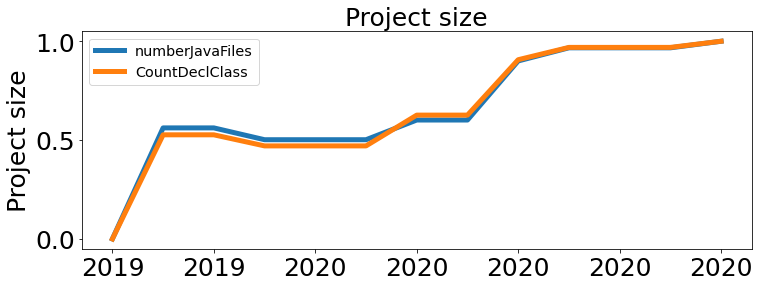

In [74]:
plotProjectSizeMetrics(frameworkName, frameworkMetrics[codesample])

4 - OO Metrics

In [105]:
def plotOOMetrics(codesample, dataset):
    subplot = dataset["SumCyclomatic"].plot(legend=True)     
    subplot = dataset["CountDeclMethodAll"].plot(legend=True)
    subplot = dataset["MaxInheritanceTree"].plot(legend=True)
    subplot = dataset["CountClassCoupled"].plot(legend=True)
    subplot = dataset["CountClassDerived"].plot(legend=True)
    subplot = dataset["PercentLackOfCohesion"].plot(legend=True)
    #subplot = dataset["questions"].plot(legend=True)
    subplot.set_ylabel("OO metrics")
    subplot.set_title("OO metrics")
    subplot.figure.savefig(f"5-PlottingGraphics/1-CodeSamples/ooMetricsExample.pdf",bbox_inches = 'tight')

In [106]:
frameworkMetrics = azureMetrics
codesample = "Azure-Samples/Azure-Spring-Cloud-Samples"
frameworkName = ""

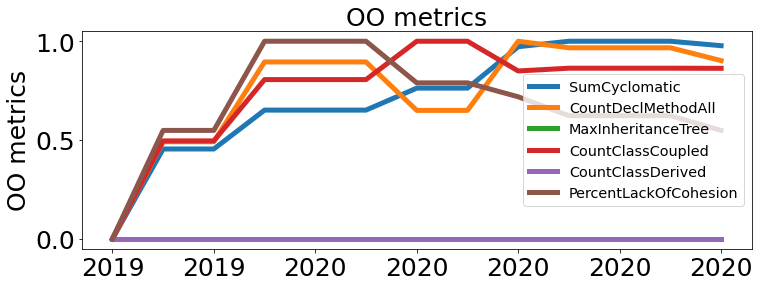

In [107]:
plotOOMetrics(frameworkName, frameworkMetrics[codesample])